In [1]:
pip install pandas matplotlib seaborn

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 

<ipython-input-2-d49ad0dfb4d5>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")


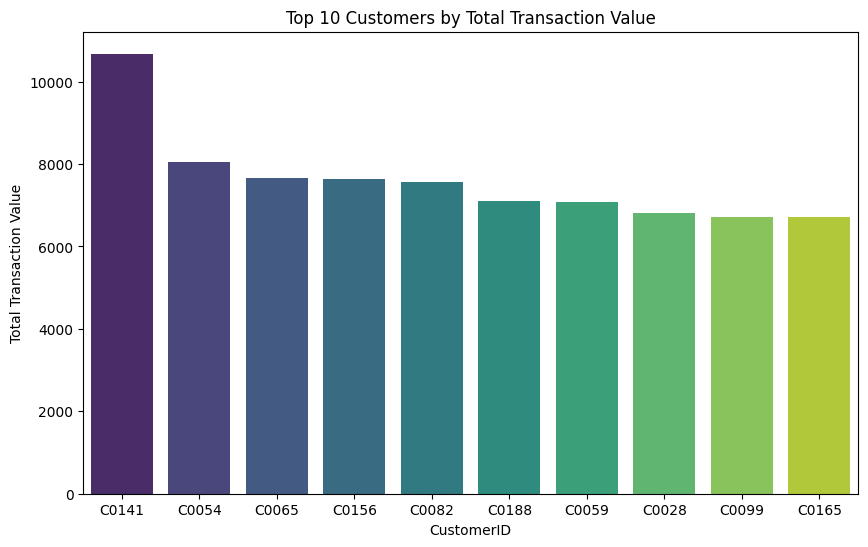

Revenue by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-2-d49ad0dfb4d5>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="coolwarm")


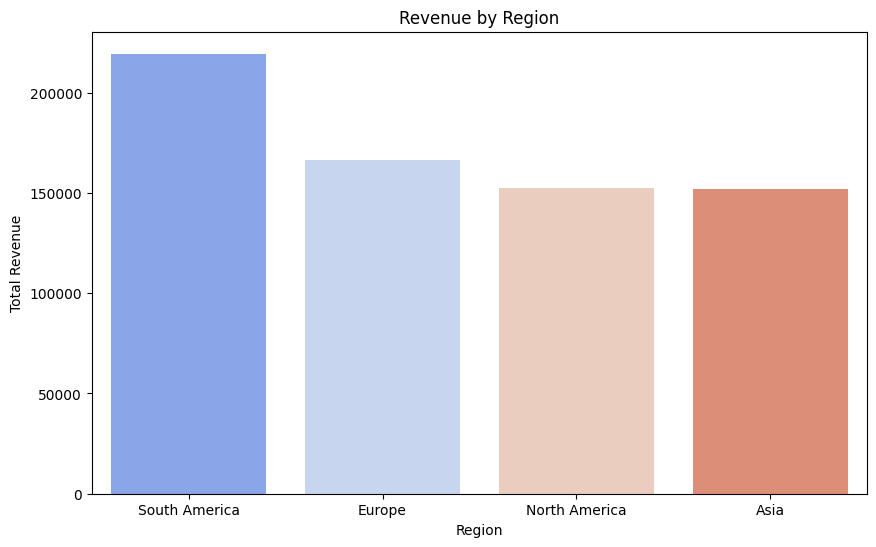

Most Purchased Product Categories:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


<ipython-input-2-d49ad0dfb4d5>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")


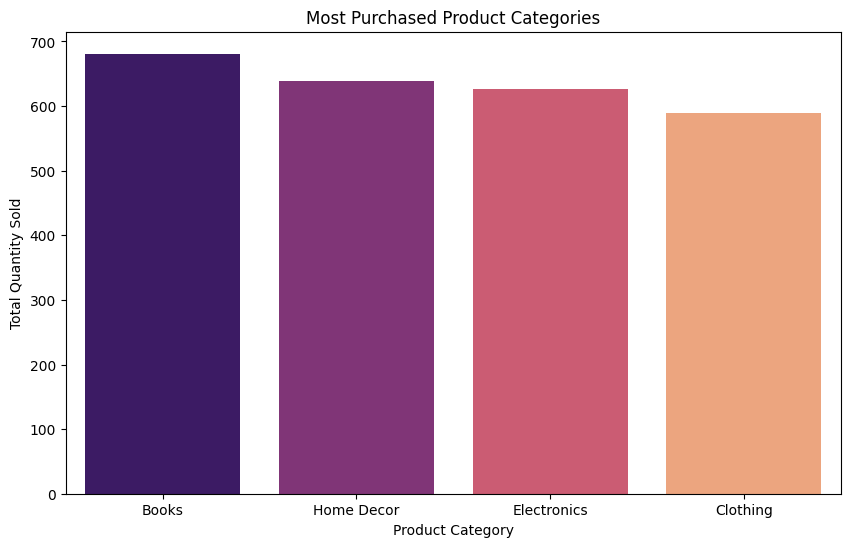

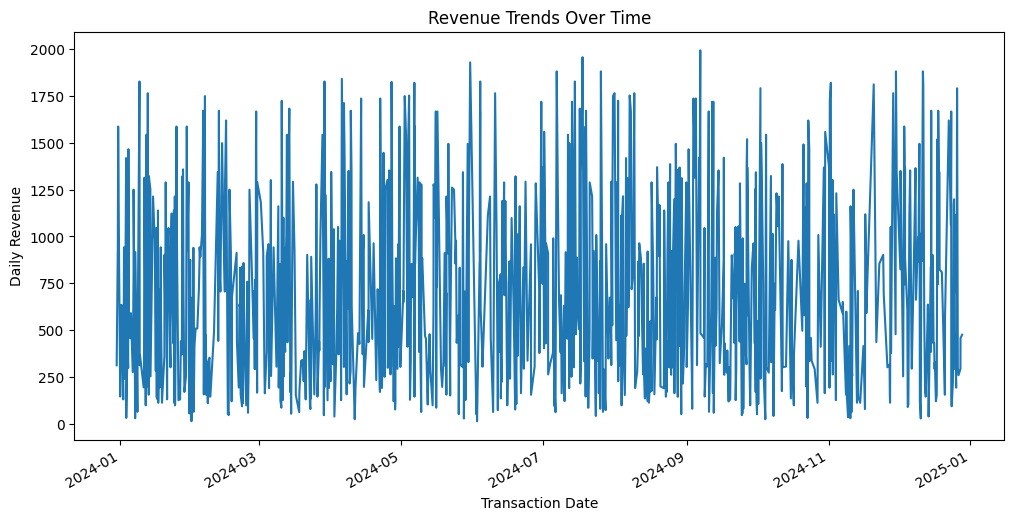

Top 10 Most Popular Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


<ipython-input-2-d49ad0dfb4d5>:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_products.index, x=popular_products.values, palette="viridis")


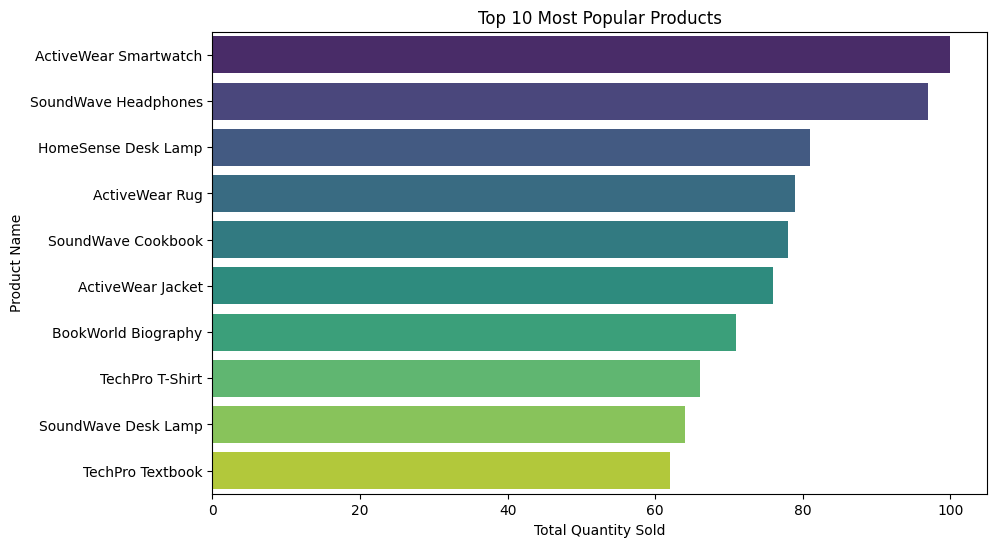


Business Insights:
1. The top 10 customers account for a significant portion of revenue, indicating a small group of high-value customers.
2. Region-wise analysis shows that [Top Region] generates the highest revenue, highlighting it as a key market.
3. Product category analysis reveals that [Top Category] is the most popular, suggesting demand trends.
4. Revenue trends over time show seasonal spikes, likely indicating key sales periods or promotions.
5. The most popular products contribute heavily to revenue, with [Top Product] leading in total quantity sold.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Display basic info and preview of datasets
print("Customers Dataset Info:")
print(customers.info(), "\n")
print(customers.head(), "\n")

print("Products Dataset Info:")
print(products.info(), "\n")
print(products.head(), "\n")

print("Transactions Dataset Info:")
print(transactions.info(), "\n")
print(transactions.head(), "\n")

# Check for missing values
print("Missing Values in Customers:")
print(customers.isnull().sum(), "\n")

print("Missing Values in Products:")
print(products.isnull().sum(), "\n")

print("Missing Values in Transactions:")
print(transactions.isnull().sum(), "\n")

# Merging datasets
data = transactions.merge(customers, on="CustomerID", how="left")
data = data.merge(products, on="ProductID", how="left")

print("Merged Dataset Overview:")
print(data.info(), "\n")
print(data.head(), "\n")

# Quick statistics
print("Basic Statistics:")
print(data.describe())

# ----------- Visualizations and Analysis ------------

# 1. Top 10 customers by total transaction value
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Total Transaction Value:")
print(top_customers)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette="viridis")
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("CustomerID")
plt.ylabel("Total Transaction Value")
plt.show()

# 2. Revenue by region
region_revenue = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Revenue by Region:")
print(region_revenue)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="coolwarm")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()

# 3. Most purchased product categories
category_sales = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Most Purchased Product Categories:")
print(category_sales)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="magma")
plt.title("Most Purchased Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")
plt.show()

# 4. Revenue trends over time
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
daily_revenue = data.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
daily_revenue.plot()
plt.title("Revenue Trends Over Time")
plt.xlabel("Transaction Date")
plt.ylabel("Daily Revenue")
plt.show()

# 5. Top 10 most popular products
popular_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Popular Products:")
print(popular_products)

plt.figure(figsize=(10, 6))
sns.barplot(y=popular_products.index, x=popular_products.values, palette="viridis")
plt.title("Top 10 Most Popular Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()

# ----------- Business Insights ------------
insights = [
    "1. The top 10 customers account for a significant portion of revenue, indicating a small group of high-value customers.",
    "2. Region-wise analysis shows that [Top Region] generates the highest revenue, highlighting it as a key market.",
    "3. Product category analysis reveals that [Top Category] is the most popular, suggesting demand trends.",
    "4. Revenue trends over time show seasonal spikes, likely indicating key sales periods or promotions.",
    "5. The most popular products contribute heavily to revenue, with [Top Product] leading in total quantity sold."
]

print("\nBusiness Insights:")
for insight in insights:
    print(insight)

# Save insights to a text file for report generation
with open("business_insights.txt", "w") as f:
    for insight in insights:
        f.write(insight + "\n")
